In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary

## Importing all the files created 

In [6]:
!pip install pytorch-gradcam

  Stored in directory: C:\Users\RASHU TYAGI\AppData\Local\pip\Cache\wheels\e8\1e\35\d24150a078a90ce0ad093586814d4665e945466baa89907300
Successfully built pytorch-gradcam


In [11]:
from Getting_the_Data import get_and_transform_the_data
from Displaying_the_images import display_my_images
from Model_and_summary import ResNet18, disp_summary
from train_test import train , test
from apply_grad_cam import grad_cam

## First step is to download and transform the data which here is CIFAR-10

In [9]:
train_set,test_set,train_loader,test_loader,classes = get_and_transform_the_data()

CUDA Available? True


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Displaying the images in our dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

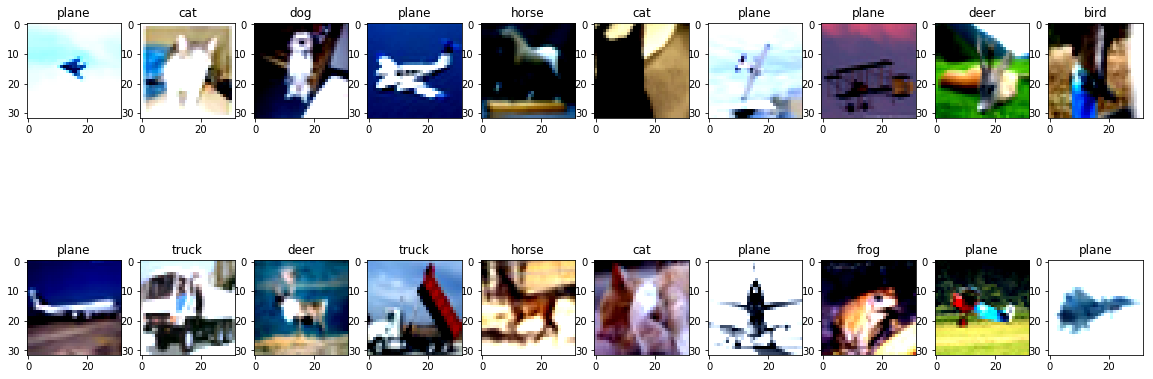

In [12]:
display_my_images(train_loader,classes)

## Moving the model for GPU usage

In [13]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model=ResNet18().to(device)

In [14]:
disp_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [15]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'

optimizer = optim.RMSprop(model.parameters(), lr=0.01)
scheduler = OneCycleLR(optimizer,max_lr=0.1,total_steps=40)

for epoch in range(1, 41):
    print(f'Epoch: {epoch} Learning_Rate {scheduler.get_lr()}')
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

Epoch: 1 Learning_Rate [0.0040000000000000036]


Loss=1.7170934677124023 Batch_id=390 Accuracy=28.64: 100%|███████████████████████████| 391/391 [01:10<00:00,  7.54it/s]



Test set: Average loss: 0.0134, Accuracy: 3674/10000 (36.74%)

Epoch: 2 Learning_Rate [0.005944337266504118]


Loss=1.4049631357192993 Batch_id=390 Accuracy=42.24: 100%|███████████████████████████| 391/391 [01:10<00:00,  7.53it/s]



Test set: Average loss: 0.0122, Accuracy: 4471/10000 (44.71%)

Epoch: 3 Learning_Rate [0.011619830424103306]


Loss=1.0708088874816895 Batch_id=390 Accuracy=50.28: 100%|███████████████████████████| 391/391 [01:11<00:00,  7.59it/s]



Test set: Average loss: 0.0093, Accuracy: 5736/10000 (57.36%)

Epoch: 4 Learning_Rate [0.020566684770626315]


Loss=1.1294832229614258 Batch_id=390 Accuracy=56.05: 100%|███████████████████████████| 391/391 [01:11<00:00,  7.41it/s]



Test set: Average loss: 0.0432, Accuracy: 3093/10000 (30.93%)

Epoch: 5 Learning_Rate [0.03206007937590945]


Loss=1.2326918840408325 Batch_id=390 Accuracy=58.97: 100%|███████████████████████████| 391/391 [01:11<00:00,  7.15it/s]



Test set: Average loss: 0.0107, Accuracy: 5768/10000 (57.68%)

Epoch: 6 Learning_Rate [0.04516888776288231]


Loss=0.9509415626525879 Batch_id=390 Accuracy=59.94: 100%|███████████████████████████| 391/391 [01:12<00:00,  7.47it/s]



Test set: Average loss: 0.0078, Accuracy: 6495/10000 (64.95%)

Epoch: 7 Learning_Rate [0.058831112237117685]


Loss=0.9316840171813965 Batch_id=390 Accuracy=67.95: 100%|███████████████████████████| 391/391 [01:09<00:00,  7.62it/s]



Test set: Average loss: 0.0074, Accuracy: 6934/10000 (69.34%)

Epoch: 8 Learning_Rate [0.07193992062409055]


Loss=1.0655241012573242 Batch_id=390 Accuracy=69.30: 100%|███████████████████████████| 391/391 [01:09<00:00,  7.16it/s]



Test set: Average loss: 0.0084, Accuracy: 6409/10000 (64.09%)

Epoch: 9 Learning_Rate [0.08343331522937368]


Loss=118.21485900878906 Batch_id=390 Accuracy=67.72: 100%|███████████████████████████| 391/391 [01:09<00:00,  7.63it/s]



Test set: Average loss: 12.9510, Accuracy: 1224/10000 (12.24%)

Epoch: 10 Learning_Rate [0.0923801695758967]


Loss=2.277097225189209 Batch_id=390 Accuracy=13.15: 100%|████████████████████████████| 391/391 [01:10<00:00,  7.43it/s]



Test set: Average loss: 0.0706, Accuracy: 1112/10000 (11.12%)

Epoch: 11 Learning_Rate [0.09805566273349588]


Loss=2.263171434402466 Batch_id=390 Accuracy=16.54: 100%|████████████████████████████| 391/391 [01:10<00:00,  7.47it/s]



Test set: Average loss: 0.0159, Accuracy: 1955/10000 (19.55%)

Epoch: 12 Learning_Rate [0.1]


Loss=1.7858902215957642 Batch_id=390 Accuracy=26.22: 100%|███████████████████████████| 391/391 [01:12<00:00,  7.65it/s]



Test set: Average loss: 0.0131, Accuracy: 3395/10000 (33.95%)

Epoch: 13 Learning_Rate [0.09968561175222017]


Loss=1.3260982036590576 Batch_id=390 Accuracy=42.08: 100%|███████████████████████████| 391/391 [01:10<00:00,  7.54it/s]



Test set: Average loss: 0.0122, Accuracy: 4659/10000 (46.59%)

Epoch: 14 Learning_Rate [0.09874640062350874]


Loss=1.4087852239608765 Batch_id=390 Accuracy=54.79: 100%|███████████████████████████| 391/391 [01:10<00:00,  7.57it/s]



Test set: Average loss: 0.0099, Accuracy: 5642/10000 (56.42%)

Epoch: 15 Learning_Rate [0.09719417773875232]


Loss=0.9782121777534485 Batch_id=390 Accuracy=60.18: 100%|███████████████████████████| 391/391 [01:11<00:00,  7.36it/s]



Test set: Average loss: 0.0097, Accuracy: 5869/10000 (58.69%)

Epoch: 16 Learning_Rate [0.09504846320134738]


Loss=1.1018235683441162 Batch_id=390 Accuracy=62.80: 100%|███████████████████████████| 391/391 [01:15<00:00,  7.64it/s]



Test set: Average loss: 0.0089, Accuracy: 6173/10000 (61.73%)

Epoch: 17 Learning_Rate [0.09233624061657436]


Loss=0.9569516181945801 Batch_id=390 Accuracy=64.99: 100%|███████████████████████████| 391/391 [01:09<00:00,  5.62it/s]



Test set: Average loss: 0.0079, Accuracy: 6643/10000 (66.43%)

Epoch: 18 Learning_Rate [0.089091617757105]


Loss=0.9365575909614563 Batch_id=390 Accuracy=70.86: 100%|███████████████████████████| 391/391 [01:10<00:00,  7.64it/s]



Test set: Average loss: 0.0072, Accuracy: 6934/10000 (69.34%)

Epoch: 19 Learning_Rate [0.08535539763797113]


Loss=1.1282166242599487 Batch_id=390 Accuracy=71.99: 100%|███████████████████████████| 391/391 [01:10<00:00,  7.62it/s]



Test set: Average loss: 0.0063, Accuracy: 7530/10000 (75.30%)

Epoch: 20 Learning_Rate [0.0811745653949763]


Loss=1.091168761253357 Batch_id=390 Accuracy=75.16: 100%|████████████████████████████| 391/391 [01:10<00:00,  7.44it/s]



Test set: Average loss: 0.0056, Accuracy: 7612/10000 (76.12%)

Epoch: 21 Learning_Rate [0.07660169741935154]


Loss=0.5125759243965149 Batch_id=390 Accuracy=77.94: 100%|███████████████████████████| 391/391 [01:15<00:00,  5.20it/s]



Test set: Average loss: 0.0068, Accuracy: 7487/10000 (74.87%)

Epoch: 22 Learning_Rate [0.07169430017913009]


Loss=0.7758492827415466 Batch_id=390 Accuracy=79.24: 100%|███████████████████████████| 391/391 [01:15<00:00,  7.30it/s]



Test set: Average loss: 0.0062, Accuracy: 7503/10000 (75.03%)

Epoch: 23 Learning_Rate [0.06651408704194597]


Loss=0.3797483742237091 Batch_id=390 Accuracy=79.26: 100%|███████████████████████████| 391/391 [01:11<00:00,  7.21it/s]



Test set: Average loss: 0.0061, Accuracy: 7688/10000 (76.88%)

Epoch: 24 Learning_Rate [0.06112620219362893]


Loss=0.8175967931747437 Batch_id=390 Accuracy=81.63: 100%|███████████████████████████| 391/391 [01:10<00:00,  7.44it/s]



Test set: Average loss: 0.0055, Accuracy: 7833/10000 (78.33%)

Epoch: 25 Learning_Rate [0.055598401412270175]


Loss=0.5639023780822754 Batch_id=390 Accuracy=82.48: 100%|███████████████████████████| 391/391 [01:12<00:00,  7.55it/s]



Test set: Average loss: 0.0063, Accuracy: 7666/10000 (76.66%)

Epoch: 26 Learning_Rate [0.0500002]


Loss=0.7224020957946777 Batch_id=390 Accuracy=83.51: 100%|███████████████████████████| 391/391 [01:11<00:00,  7.51it/s]



Test set: Average loss: 0.0052, Accuracy: 8084/10000 (80.84%)

Epoch: 27 Learning_Rate [0.04440199858772983]


Loss=0.7180603742599487 Batch_id=390 Accuracy=84.39: 100%|███████████████████████████| 391/391 [01:15<00:00,  7.54it/s]



Test set: Average loss: 0.0050, Accuracy: 8153/10000 (81.53%)

Epoch: 28 Learning_Rate [0.03887419780637107]


Loss=0.41364842653274536 Batch_id=390 Accuracy=84.71: 100%|██████████████████████████| 391/391 [01:10<00:00,  7.21it/s]



Test set: Average loss: 0.0050, Accuracy: 8229/10000 (82.29%)

Epoch: 29 Learning_Rate [0.03348631295805405]


Loss=0.602688193321228 Batch_id=390 Accuracy=86.53: 100%|████████████████████████████| 391/391 [01:11<00:00,  7.60it/s]



Test set: Average loss: 0.0055, Accuracy: 8082/10000 (80.82%)

Epoch: 30 Learning_Rate [0.028306099820869922]


Loss=0.5465839505195618 Batch_id=390 Accuracy=86.82: 100%|███████████████████████████| 391/391 [01:10<00:00,  7.48it/s]



Test set: Average loss: 0.0048, Accuracy: 8274/10000 (82.74%)

Epoch: 31 Learning_Rate [0.023398702580648485]


Loss=0.32694312930107117 Batch_id=390 Accuracy=87.83: 100%|██████████████████████████| 391/391 [01:11<00:00,  7.51it/s]



Test set: Average loss: 0.0043, Accuracy: 8348/10000 (83.48%)

Epoch: 32 Learning_Rate [0.0188258346050237]


Loss=0.1724962294101715 Batch_id=390 Accuracy=88.90: 100%|███████████████████████████| 391/391 [01:10<00:00,  7.53it/s]



Test set: Average loss: 0.0048, Accuracy: 8337/10000 (83.37%)

Epoch: 33 Learning_Rate [0.014645002362028864]


Loss=0.4132879376411438 Batch_id=390 Accuracy=89.80: 100%|███████████████████████████| 391/391 [01:10<00:00,  7.53it/s]



Test set: Average loss: 0.0044, Accuracy: 8392/10000 (83.92%)

Epoch: 34 Learning_Rate [0.010908782242895008]


Loss=0.3135248124599457 Batch_id=390 Accuracy=90.87: 100%|███████████████████████████| 391/391 [01:10<00:00,  7.39it/s]



Test set: Average loss: 0.0045, Accuracy: 8358/10000 (83.58%)

Epoch: 35 Learning_Rate [0.0076641593834256404]


Loss=0.117383673787117 Batch_id=390 Accuracy=91.43: 100%|████████████████████████████| 391/391 [01:10<00:00,  7.64it/s]



Test set: Average loss: 0.0044, Accuracy: 8409/10000 (84.09%)

Epoch: 36 Learning_Rate [0.004951936798652629]


Loss=0.2545124590396881 Batch_id=390 Accuracy=92.04: 100%|███████████████████████████| 391/391 [01:09<00:00,  7.66it/s]



Test set: Average loss: 0.0044, Accuracy: 8497/10000 (84.97%)

Epoch: 37 Learning_Rate [0.002806222261247683]


Loss=0.27505218982696533 Batch_id=390 Accuracy=92.84: 100%|██████████████████████████| 391/391 [01:09<00:00,  7.61it/s]



Test set: Average loss: 0.0043, Accuracy: 8512/10000 (85.12%)

Epoch: 38 Learning_Rate [0.0012539993764912555]


Loss=0.13705667853355408 Batch_id=390 Accuracy=93.40: 100%|██████████████████████████| 391/391 [01:15<00:00,  5.20it/s]



Test set: Average loss: 0.0044, Accuracy: 8513/10000 (85.13%)

Epoch: 39 Learning_Rate [0.0003147882477798485]


Loss=0.26092809438705444 Batch_id=390 Accuracy=93.66: 100%|██████████████████████████| 391/391 [01:15<00:00,  7.32it/s]



Test set: Average loss: 0.0043, Accuracy: 8533/10000 (85.33%)

Epoch: 40 Learning_Rate [4e-07]


Loss=0.1440194547176361 Batch_id=390 Accuracy=93.66: 100%|███████████████████████████| 391/391 [01:10<00:00,  7.63it/s]



Test set: Average loss: 0.0043, Accuracy: 8544/10000 (85.44%)



# Applying Grad Cam

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\torch\nn\functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


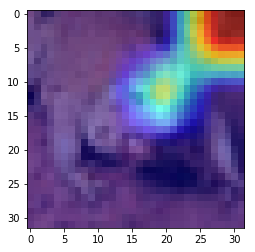

In [16]:
img=test_set.data[5]
layer= 'layer4'

cam = grad_cam(img, model, layer)
cam = torch.stack(cam)[4]
cam = np.transpose(cam, (1, 2, 0))
plt.imshow(cam)

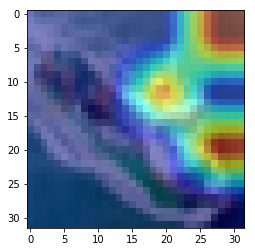

In [17]:
img=test_set.data[15]
layer= 'layer4'

cam = grad_cam(img, model, layer)
cam = torch.stack(cam)[4]
cam = np.transpose(cam, (1, 2, 0))
plt.imshow(cam)

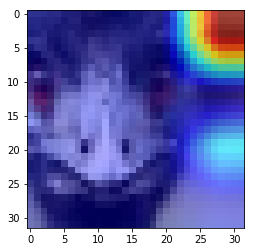

In [18]:
img=test_set.data[35]
layer= 'layer4'

cam = grad_cam(img, model, layer)
cam = torch.stack(cam)[4]
cam = np.transpose(cam, (1, 2, 0))
plt.imshow(cam)

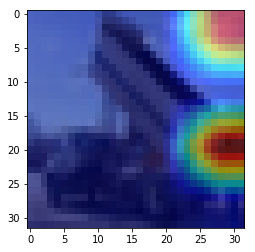

In [19]:
img=test_set.data[50]
layer= 'layer4'

cam = grad_cam(img, model, layer)
cam = torch.stack(cam)[4]
cam = np.transpose(cam, (1, 2, 0))
plt.imshow(cam)

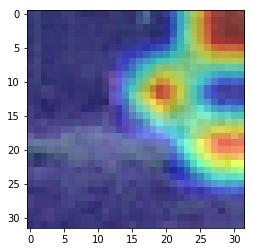

In [20]:
img=test_set.data[32]
layer= 'layer4'

cam = grad_cam(img, model, layer)
cam = torch.stack(cam)[4]
cam = np.transpose(cam, (1, 2, 0))
plt.imshow(cam)